In [7]:
## Import Modules
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from decimal import Decimal
%matplotlib inline

In [8]:
## Get working directory
os.getcwd()

'C:\\Users\\khrab\\1 - Machine Learning\\Week 5'

In [9]:
## Change working directory
os.chdir('C:\\Users\\khrab\\1 - Machine Learning\\Week 5')

In [10]:
## ****PROBLEM #1 - NEWSGROUP DATA****
## Import all data sets

modifiedTerms = pd.read_csv('modifiedterms.txt', header = None)
testClasses = pd.read_csv('testClasses.txt', delimiter='\t', header = None)
trainClasses = pd.read_csv('trainClasses.txt', delimiter='\t', header = None)
testMatrixModified = pd.read_csv('testMatrixModified.txt', delimiter='\t', header = None)
trainMatrixModified = pd.read_csv('trainMatrixModified.txt', delimiter='\t', header = None)

modifiedTerms = modifiedTerms.loc[:,0]

In [11]:
## (a.) Create your own KNN classifier function
## inputs: training data matrix, labels, instance to be classified, value of k,
## and should return predicted class for instance and top 5 neighbors.
## Works with Euclidean distance and Cosine Similarity.

In [12]:
##Transposing data and casting to numpy arrays, etc.

dtTestArray = np.array(testMatrixModified.T)
dtTrainArray = np.array(trainMatrixModified.T)




testTermFreqs = np.array(testMatrixModified.sum(axis=1))
trainTermFreqs = np.array(trainMatrixModified.sum(axis=1))

##200 rows, 2 columns
testClasses = np.array(testClasses)
trainClasses = np.array(trainClasses)



In [13]:
##Chose to have measure passed in to function
def knn_classifier(x, d, labels, k, measure):
    
    if measure == 0:
        ##Euclidean
        dists = np.sqrt(((d - x)**2).sum(axis=1))
        
     
    elif measure == 1:
        ##Cosine Similarity
        d_norm = np.array([np.linalg.norm(d[i]) for i in range(len(d))])
       
        x_norm = np.linalg.norm(x)
      
        sims = np.dot(d,x)/(d_norm * x_norm)
        dists = 1 - sims
    
    idx = np.argsort(dists)
    
   
    
    values = []
    
    for i in idx:
        for j in labels:
            if any(i == j):
                values.append(j[1])
    
   
    
    zeroCount = 0
    oneCount = 0
    
    
    for val in values[:k]:
        if val == 0:
            zeroCount += 1
        elif val == 1:
            oneCount += 1
    
    winnerVal = ''
    ##In the case of a tie, the class represented by '0' wins
    ##This is my arbitrary tiebreaker methodology.
    if zeroCount >= oneCount:
        winnerVal = 0
    elif oneCount > zeroCount:
        winnerVal = 1
    
              
    
    return idx[:k], sorted(dists)[:k], winnerVal

In [14]:
##Setting up sample instance to feed in to classifier
a = dtTrainArray[[440]]
##To make sure instance doesn't count itself as a neighbor
b = np.delete(dtTrainArray, (440), axis=0)


In [15]:
neighbor_index, distances, winnerVal = knn_classifier(a, b, trainClasses, 5, 0)

In [16]:
##Tried on training data
print("Neighbor Index: {}".format(neighbor_index))
print("Distances of Neighbors: {}".format(distances))
print("The Category Based on Nearest Neighbors is: {}".format(winnerVal))


Neighbor Index: [756  38 710 797  69]
Distances of Neighbors: [8.426149773176359, 8.602325267042627, 8.660254037844387, 8.774964387392123, 8.94427190999916]
The Category Based on Nearest Neighbors is: 1


In [17]:
## (b.) Create a function to compute the classification accuracy over the test 
## data set (ratio of correct predictions to the number of test instances)
## This function will call the classifier function in part (a.) on all the
## test instances and in each case compares the actual test class label
## to the predicted class label

In [18]:
## Function to return accuracy. Calls classifier function and returns accuracy
## percentage.
def accuracy(d, labels, k, measure):
    dictPredicted = {}
    dictActual = {}
    predictList = []
    counter = -1
    for a in d:
        counter = counter + 1
        
        neighbor_index, distances, winnerVal = knn_classifier(a, d, labels, k, measure)
        
        dictPredicted[counter]=winnerVal
    
    for b in labels:
        dictActual[b[0]] = b[1]
    
    for k, v in dictPredicted.items():
        for key, val in dictActual.items():
            if k == key:
                predictList.append([v, val])
    
    accurate = 0
    total = 0
    
    for k, v in predictList:
        if k == v:
            accurate = accurate + 1
        total = total + 1
    
    
    accuracy = float(accurate/total)
    
    return accuracy


In [19]:
## NOTE: THIS TAKES AN EXTREMELY LONG TIME TO RUN ON THE TRAINING DATA
## When grading, maybe skip trying this on training, or switch to 
## accuracy(dtTestArray, testClasses, 5 0)
## if preferred
accuracy(dtTrainArray, trainClasses, 5, 0)


0.95625

In [20]:
## (c.) Run your accuracy function on a range of values for K in order to 
## Compare accuracy values for numbers of neighbors. Use both Euclidean dist.
## and Cosine similarities
## Note: I used the test data for the trials because it wasn't
## Specified to use the training sets
## I did k values of 1 through 20, and alternated between Euclidean and 
## Cosine distance to make sure I got a good mix between functions and k values
## For later plotting.


In [21]:
## Trial 1: 1 nearest neighbors, Euclidean Distance
trial1 = accuracy(dtTestArray, testClasses, 1, 0)
print(trial1)

0.995


In [22]:
## Trial 2: 2 nearest neighbors, Cosine Similarity
trial2 = accuracy(dtTestArray, testClasses, 2 , 1)
print(trial2)

0.98


In [23]:
## Trial 3: 3 nearest neighbors, Euclidean Distance
trial3 = accuracy(dtTestArray, testClasses, 3, 0)
print(trial3)

0.77


In [24]:
## Trial 4: 4 nearest neighbors, Cosine Similarity
trial4 = accuracy(dtTestArray, testClasses, 4, 1)
print(trial4)

0.985


In [25]:
## Trial 5: 5 nearest neighbors, Euclidean Distance
trial5 = accuracy(dtTestArray, testClasses, 5, 0)
print(trial5)

0.83


In [26]:
## Trial 6: 6 nearest neighbors, Cosine Similarity
trial6 = accuracy(dtTestArray, testClasses, 6, 1)
print(trial6)

0.975


In [27]:
## Trial 7: 7 nearest neighbors, Euclidean Distance
trial7 = accuracy(dtTestArray, testClasses, 7, 0)
print(trial7)

0.92


In [28]:
## Trial 8: 8 nearest neighbors, Cosine Similarity
trial8 = accuracy(dtTestArray, testClasses, 8, 1)
print(trial8)

0.94


In [29]:
## Trial 9: 9 nearest neighbors, Euclidean Distance
trial9 = accuracy(dtTestArray, testClasses, 9, 0)
print(trial9)

0.89


In [30]:
## Trial 10: 10 nearest neighbors, Cosine Similarity
trial10 = accuracy(dtTestArray, testClasses, 10, 1)
print(trial10)

0.92


In [31]:
## Trial 11: 11 nearest neighbors, Euclidean Distance
trial11 = accuracy(dtTestArray, testClasses, 11, 0)
print(trial11)

0.9


In [32]:
## Trial 12: 12 nearest neighbors, Cosine Similarity
trial12 = accuracy(dtTestArray, testClasses, 12, 1)
print(trial12)

0.905


In [33]:
## Trial 13: 13 nearest neighbors, Euclidean Distance
trial13 = accuracy(dtTestArray, testClasses, 13, 0)
print(trial13)

0.93


In [34]:
## Trial 14: 14 nearest neighbors, Cosine Similarity
trial14 = accuracy(dtTestArray, testClasses, 14, 1)
print(trial14)

0.86


In [35]:
## Trial 15: 15 nearest neighbors, Euclidean Distance
trial15 = accuracy(dtTestArray, testClasses, 15, 0)
print(trial15)

0.9


In [36]:
## Trial 16: 16 nearest neighbors, Cosine Similarity
trial16 = accuracy(dtTestArray, testClasses, 16, 1)
print(trial16)

0.84


In [37]:
## Trial 17: 17 nearest neighbors, Euclidean Distance
trial17 = accuracy(dtTestArray, testClasses, 17, 0)
print(trial17)

0.88


In [38]:
## Trial 18: 18 nearest neighbors, Cosine Similarity
trial18 = accuracy(dtTestArray, testClasses, 18, 1)
print(trial18)

0.805


In [39]:
## Trial 19: 19 nearest neighbors, Euclidean Distance
trial19 = accuracy(dtTestArray, testClasses, 19, 0)
print(trial19)

0.875


In [40]:
## Trial 20: 20 nearest neighbors, Cosine Similarity
trial20 = accuracy(dtTestArray, testClasses, 20, 1)
print(trial20)

0.795


In [41]:
##Manually adding trials to list (bad practice, I know.. sorry!)
euclideanList = [trial1, trial3, trial5, trial7, trial9, trial11, trial13, trial15, trial17, trial19]
cosineList = [trial2, trial4, trial6, trial8, trial10, trial12, trial14, trial16, trial18, trial20]

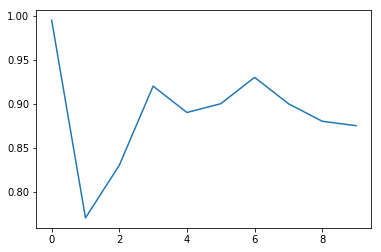

In [42]:
plt.plot(euclideanList)

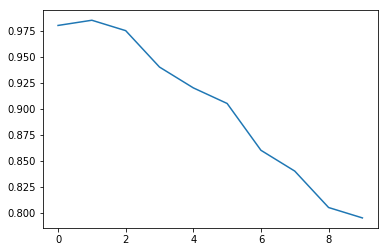

In [43]:
plt.plot(cosineList)

In [44]:
## My findings from these plots (the first being for Euclidean trials
## over the course of 10 trials with increasing k values, and the second 
## for Cosine Similarity over the course of 10 trials with increasing k
## values) is that Euclidean distance had an initial dropoff as k started
## increasing, but it was able to rebound and improve learning rate as k 
## increased.
## For cosine similarity, accuracy got progressively worse and worse
## as k increased.

In [45]:
def tf(dataset, row):
    
    for col in range(0, dataset.shape[1]):
            tf = dataset[row,col]
            return tf ## for each row

def idf(dataset, col):

    list1 = []
    nk = 0
    for rowval in range(0, dataset.shape[0]):
        t = dataset[rowval, col]
        list1.append(t)
    
    for i in list1:
        if i != 0:
            nk = nk + 1
            
    if nk == 0:
        nk = 1 ##avoid divide by zero if term appears in no docs
    return nk ##for each column

def tfidf(dataset):
    tfidfList = []
    N = dataset.shape[0]
    for col in range(0, dataset.shape[1]):
        nk = idf(dataset, col)
        for row in range(0, dataset.shape[0]):
            temp = tf(dataset, row)
            
            tfidf = temp * np.log(N/nk)
            tfidfList.append(tfidf)
    
    ModifiedDataset = np.array(tfidfList)
    Mod = ModifiedDataset.reshape(dataset.shape[0], dataset.shape[1])
    return Mod
            
        
    
    
            

            

In [46]:
## Note: rather than modifying the original arrays, I created new ones.
TFIDFTest = tfidf(dtTestArray)
TFIDFTrain = tfidf(dtTrainArray)


In [47]:
## Trial 1: 1 nearest neighbors, Euclidean Distance
t1 = accuracy(TFIDFTest, testClasses, 1, 0)
print(t1)

0.995


In [48]:
## Trial 2: 2 nearest neighbors, Cosine Similarity
t2 = accuracy(TFIDFTest, testClasses, 2, 1)
print(t2)

0.76


In [49]:
## Trial 3: 3 nearest neighbors, Euclidean Distance
t3 = accuracy(TFIDFTest, testClasses, 3, 0)
print(t3)

0.78


In [50]:
## Trial 4: 4 nearest neighbors, Cosine Similarity
t4 = accuracy(TFIDFTest, testClasses, 4, 1)
print(t4)

0.705


In [51]:
## Trial 5: 5 nearest neighbors, Euclidean Distance
t5 = accuracy(TFIDFTest, testClasses, 5, 0)
print(t5)

0.695


In [52]:
## Trial 6: 6 nearest neighbors, Cosine Similarity
t6 = accuracy(TFIDFTest, testClasses, 6, 1)
print(t6)

0.65


In [53]:
## Trial 7: 7 nearest neighbors, Euclidean Distance
t7 = accuracy(TFIDFTest, testClasses, 7, 0)
print(t7)

0.635


In [54]:
## Trial 8: 8 nearest neighbors, Cosine Similarity
t8 = accuracy(TFIDFTest, testClasses, 8, 1)
print(t8)

0.61


In [55]:
## Trial 9: 9 nearest neighbors, Euclidean Distance
t9 = accuracy(TFIDFTest, testClasses, 9, 0)
print(t9)

0.615


In [56]:
## Trial 10: 10 nearest neighbors, Cosine Similarity
t10 = accuracy(TFIDFTest, testClasses, 10, 1)
print(t10)

0.585


In [57]:
## Trial 11: 11 nearest neighbors, Euclidean Distance
t11 = accuracy(TFIDFTest, testClasses, 11, 0)
print(t11)

0.58


In [58]:
## Trial 12: 12 nearest neighbors, Cosine Similarity
t12 = accuracy(TFIDFTest, testClasses, 12, 1)
print(t12)

0.595


In [59]:
## Trial 13: 13 nearest neighbors, Euclidean Distance
t13 = accuracy(TFIDFTest, testClasses, 13, 0)
print(t13)

0.555


In [60]:
## Trial 14: 14 nearest neighbors, Cosine Similarity
t14 = accuracy(TFIDFTest, testClasses, 14,  1)
print(t14)

0.6


In [61]:
## Trial 15: 15 nearest neighbors, Euclidean Distance
t15 = accuracy(TFIDFTest, testClasses, 15, 0)
print(t15)

0.535


In [62]:
## Trial 16: 16 nearest neighbors, Cosine Similarity
t16 = accuracy(TFIDFTest, testClasses, 16, 1)
print(t16)

0.6


In [63]:
## Trial 17: 17 nearest neighbors, Euclidean Distance
t17 = accuracy(TFIDFTest, testClasses, 17, 0)
print(t17)

0.57


In [64]:
## Trial 18: 18 nearest neighbors, Cosine Similarity
t18 = accuracy(TFIDFTest, testClasses, 18, 1)
print(t18)

0.585


In [65]:
## Trial 19: 19, nearest neighbors, Euclidean Distance
t19 = accuracy(TFIDFTest, testClasses, 19, 0)
print(t19)

0.565


In [66]:
## Trial 20: 20 nearest neighbors, Cosine Similarity
t20 = accuracy(TFIDFTest, testClasses, 20, 1)
print(t20)

0.585


In [67]:
##Manually adding trials to list again (bad practice, I know.. sorry!)
euclideanListTF = [t1, t3, t5, t7, t9, t11, t13, t15, t17, t19]
cosineListTF = [t2, t4, t6, t8, t10, t12, t14, t16, t18, t20]

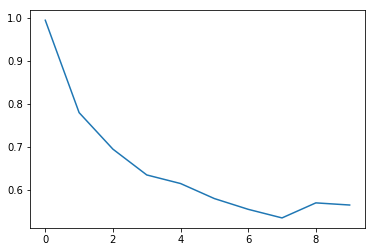

In [68]:
plt.plot(euclideanListTF)

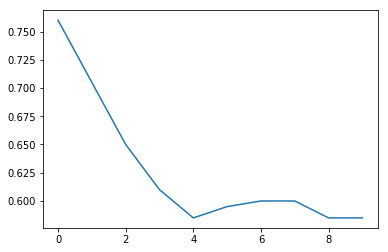

In [69]:
plt.plot(cosineListTF)

In [70]:
## These results were not what I was expecting. Again, as k increases, 
## the accuracy goes down. However, the change in accuracy is way more 
## pronounced on the TFxIDF weighted values...

In [71]:
## 2.  CLASSIFICATION USING SCIKIT-LEARN

In [72]:
bank_data = pd.read_csv("bank_data-Copy1.csv", sep=',')

In [73]:
## a. Load and preprocess the data using Numpy or Pandas and Scikit-learn
## 1. Separate 'pep' from data to be used for training and testing.
## 2. Convert selected dataset into standard spreadsheet format
## 3. Split transformed data into training and testing using (80-20)
##    randomized split.

In [74]:
bank_data.shape

(600, 12)

In [75]:
bank_data.head()

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [76]:
bank_records = bank_data[['id', 'income', 'children', 'gender', 'region', 'married', 'car', 'savings_acct', 'current_acct', 'mortgage']]
bank_records.head()

,id,income,children,gender,region,married,car,savings_acct,current_acct,mortgage
0,ID12101,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO
1,ID12102,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES
2,ID12103,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO
3,ID12104,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO
4,ID12105,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO


In [77]:
bank_target = bank_data.pep
bank_target.head()

0    YES
1     NO
2     NO
3     NO
4     NO
Name: pep, dtype: object

In [78]:
##Note: Removed ID#'s since they give no value
bank_matrix = pd.get_dummies(bank_records[['income', 'children', 'gender', 'region', 'married', 'car', 'savings_acct', 'current_acct', 'mortgage']])
bank_matrix.head(10)

,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
0,17546.00,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
1,30085.10,3,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1
2,16575.40,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
3,20375.40,3,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0
4,50576.30,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0
5,37869.60,2,1,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0
6,8877.07,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0
7,24946.60,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,0
8,25304.30,2,1,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0
9,24212.10,2,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,0


In [79]:
from sklearn.cross_validation import train_test_split
bank_train, bank_test, bank_target_train, bank_target_test = train_test_split(bank_matrix, bank_target, test_size=0.2, random_state=33)


C:\Users\khrab\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [80]:
print(bank_test.shape)

(120, 18)


In [81]:
bank_test[0:5]

,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
456,13267.6,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1
366,29866.9,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0
131,41609.5,3,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1
448,48971.6,3,0,1,0,1,0,0,0,1,0,1,0,1,1,0,1,0
337,38080.9,1,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,1


In [82]:
## (b.) Run scikit-learn's KNN classifier on test set
## First, normalize data (values 0 to 1)
## Generate confusion matrix (visualize using matplotlib)
## Generate classification report
## Compute average accuracy score
## Experiment with different values of k and weight parameter (with or 
## without distance weighting) to see if you can improve accuracy
## Provide short discussion on what parameters worked best, & final results.

In [83]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler().fit(bank_train)
bank_train_norm = min_max_scaler.transform(bank_train)
bank_test_norm = min_max_scaler.transform(bank_test)

In [84]:
np.set_printoptions(precision=2, linewidth=200, suppress=True)
bank_train_norm[0:5]

array([[0.46, 0.67, 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  ],
       [0.78, 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  , 1.  , 0.  , 1.  , 0.  ],
       [0.16, 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  ],
       [0.18, 0.33, 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  ],
       [0.18, 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  ]])

In [85]:
from sklearn import neighbors, tree, naive_bayes

In [86]:
n_neighbors = 5
KNN = neighbors.KNeighborsClassifier(n_neighbors, weights = 'distance')
KNN.fit(bank_train_norm, bank_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [87]:
KNN_PRED_TEST = KNN.predict(bank_test_norm)

In [88]:
print (KNN_PRED_TEST)

['YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES'
 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO'
 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES'
 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO']


In [89]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [90]:
## Classification Report
print(classification_report(bank_target_test, KNN_PRED_TEST))

             precision    recall  f1-score   support

         NO       0.68      0.71      0.70        66
        YES       0.63      0.59      0.61        54

avg / total       0.66      0.66      0.66       120



In [91]:
## Confusion Matrix
KNN_CONF_MATRIX = confusion_matrix(bank_target_test, KNN_PRED_TEST)
print(KNN_CONF_MATRIX)

[[47 19]
 [22 32]]


In [92]:
## Accuracy
print(KNN.score(bank_test_norm, bank_target_test))

0.6583333333333333


In [93]:
##This is one sample run of my experiments
##The KNN classifier for this data set seemed to do better with higher values
##Of k up to a point. 80 neighbors, though very high, gave me the best
##Results for the test data. Removing the weight metric of 'distance'
##Tended to make the accuracy worse in all cases.
n_neighbors = 80
KNN = neighbors.KNeighborsClassifier(n_neighbors, weights = 'distance')
KNN.fit(bank_train_norm, bank_target_train)
KNN_PRED_TEST2 = KNN.predict(bank_test_norm)
print(KNN.score(bank_test_norm, bank_target_test))

0.7166666666666667


In [94]:
print(classification_report(bank_target_test, KNN_PRED_TEST2))

             precision    recall  f1-score   support

         NO       0.71      0.82      0.76        66
        YES       0.73      0.59      0.65        54

avg / total       0.72      0.72      0.71       120



In [95]:
KNN_CONF_MATRIX = confusion_matrix(bank_target_test, KNN_PRED_TEST2)
print(KNN_CONF_MATRIX)

[[54 12]
 [22 32]]


In [96]:
## (c.) Repeat classification using scikit-learn's decision
## tree classifier (default params) and naive bayes (gaussian)
## classifier. Generate confusion matrix, classification
## report, and accuracy scores for each classifier.
## For each model, compare the average accuracy scores on
## the test and training data sets. What does the comparison
## tell you in terms of bias-variance tradeoff?

In [97]:
## Decision Tree Classifier
TREE = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split = 3)
TREE = TREE.fit(bank_train, bank_target_train)

In [98]:
TREE_PRED_TRAIN = TREE.predict(bank_train)

In [99]:
## Decision Tree Confusion Matrix - Training Data
TREECM = confusion_matrix(bank_target_train, TREE_PRED_TRAIN, labels=['YES', 'NO'])
print(TREECM)

[[213   7]
 [  0 260]]


In [100]:
## Decision Tree Classification Report - Training Data
print(classification_report(bank_target_train, TREE_PRED_TRAIN))

             precision    recall  f1-score   support

         NO       0.97      1.00      0.99       260
        YES       1.00      0.97      0.98       220

avg / total       0.99      0.99      0.99       480



In [101]:
## Accuracy score for Tree - Training Data
print(TREE.score(bank_train, bank_target_train))

0.9854166666666667


In [102]:
TREE_PRED_TEST = TREE.predict(bank_test)

In [103]:
## Decision Tree Confusion Matrix - Test Data
TREECM = confusion_matrix(bank_target_test, TREE_PRED_TEST, labels=['YES', 'NO'])
print(TREECM)

[[42 12]
 [10 56]]


In [104]:
## Decision Tree Classification Report - Test Data
print(classification_report(bank_target_test, TREE_PRED_TEST))

             precision    recall  f1-score   support

         NO       0.82      0.85      0.84        66
        YES       0.81      0.78      0.79        54

avg / total       0.82      0.82      0.82       120



In [105]:
## Accuracy score for Tree - Training Data
print(TREE.score(bank_test, bank_target_test))

0.8166666666666667


In [106]:
## **Naive Bayes**
NB = naive_bayes.GaussianNB()
NB = NB.fit(bank_train, bank_target_train)

In [107]:
NB_PRED_TRAIN = NB.predict(bank_train)

In [108]:
## Confusion Matrix - Training Data
print(confusion_matrix(bank_target_train, NB_PRED_TRAIN, labels=['YES', 'NO']))


[[121  99]
 [ 64 196]]


In [109]:
## Classification Matrix - Training Data
print(classification_report(bank_target_train, NB_PRED_TRAIN))

             precision    recall  f1-score   support

         NO       0.66      0.75      0.71       260
        YES       0.65      0.55      0.60       220

avg / total       0.66      0.66      0.66       480



In [110]:
## Accuracy score for Tree - Training Data
print(NB.score(bank_train, bank_target_train))

0.6604166666666667


In [111]:
NB_PRED_TEST = NB.predict(bank_test)

In [112]:
## Confusion Matrix - Test Data
print(confusion_matrix(bank_target_test, NB_PRED_TEST, labels=['YES', 'NO']))


[[23 31]
 [13 53]]


In [113]:
## Classification Matrix - Test Data
print(classification_report(bank_target_test, NB_PRED_TEST))

             precision    recall  f1-score   support

         NO       0.63      0.80      0.71        66
        YES       0.64      0.43      0.51        54

avg / total       0.63      0.63      0.62       120



In [114]:
## Accuracy score for Tree - Test Data
print(NB.score(bank_test, bank_target_test))

0.6333333333333333


In [115]:
## For both models (Decision Tree and Naive Bayes),
## The accuracy was better for the training data than it was
## For the test data (as would be epected, especially given
## The split).
## We know that we want a model that is sensitive to 
## noise, but also generalizes well. When variance is high,
## we might be honing in on the noise too much - and we might
## be training on noise. When that happens, the model doesn't 
## generalize as well. This can make accuracy go down for
## the Test Sets in both models.
## We can see that both Naive Bayes and Decision Tree have
## the same precision, but Decision Tree has much higher 
## recall. It also looks like for Decision Tree precision vs.
## recall is more balanced. This one looks like it generalizes
## better on new data.

In [116]:
## Overall, it looks like Decision Tree was the most valuable
## of the three classifiers. 
## KNN was harder to control, and took a lot of trials. The
## highest accuracy I was able to attain was 71%.
## With the default parameters, Naive Bayes was even worse with
## an accuracy of 63% on test data.
## The best option for this particular set of data was a
## Decision tree model

In [117]:
## (3.) - **ADULT CENSUS DATA SET**

In [118]:
##Preprocessing: use attribute mean for numeric attributes, remove instance
## for missing categorical attributes

In [119]:
adult = pd.read_csv("adult-modified.csv", sep=',')

In [120]:
##Removing question marks
adult = adult.replace('?', 0)

In [121]:
##Fixing formatting
adult['age'] = adult['age'].astype(int)

In [122]:
age_mean = round(adult['age'].mean())

In [123]:
##Replacing missing age values with attribute mean
adult['age'] = adult['age'].replace(0, age_mean)

In [124]:
##Removing missing workclass values
adult = adult[adult.workclass != 0]

In [125]:
##Examining characteristics
adult.describe()

,age,education,hours-per-week
count,9412.000000,9412.000000,9412.000000
mean,38.357310,10.125266,41.080217
std,12.962135,2.542118,11.884590
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
max,90.000000,16.000000,99.000000


In [126]:
## Examine characteristics of the attribute - illustrate with histograms for
## numeric attributes, bar graphs for categorical, etc.

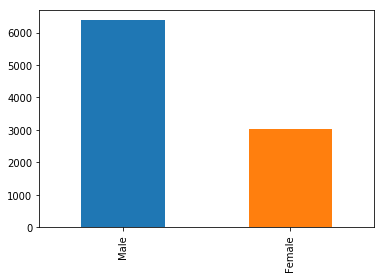

In [127]:
##Male vs. Female Counts
adult["sex"].value_counts().plot(kind='bar')

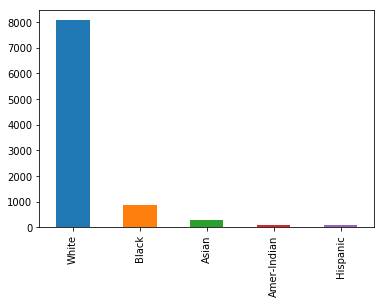

In [128]:
##Race counts
adult["race"].value_counts().plot(kind='bar')

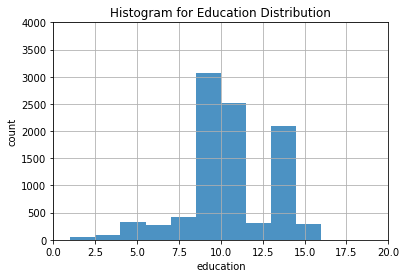

In [129]:
## Education histogram, using 10 bins
plt.hist(adult["education"], bins = 10, alpha=0.8)
plt.xlabel("education")
plt.ylabel("count")
plt.title("Histogram for Education Distribution")
plt.axis([0, 20, 0, 4000])
plt.grid(True)

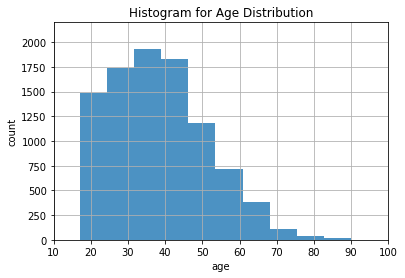

In [130]:
## Age histogram, using 10 bins
plt.hist(adult["age"], bins = 10, alpha=0.8)
plt.xlabel("age")
plt.ylabel("count")
plt.title("Histogram for Age Distribution")
plt.axis([10, 100, 0, 2200])
plt.grid(True)

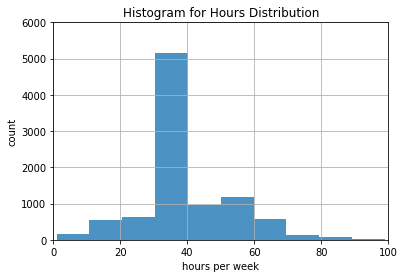

In [131]:
## Hours Per Week Histogram, using 10 bins
plt.hist(adult["hours-per-week"], bins = 10, alpha=0.8)
plt.xlabel("hours per week")
plt.ylabel("count")
plt.title("Histogram for Hours Distribution")
plt.axis([0,100,0,6000])
plt.grid(True)

In [132]:
## Cross Tab for Education + Race
edu_race = pd.crosstab([adult.education], [adult.race], margins=True)
edu_race

race,Amer-Indian,Asian,Black,Hispanic,White,All
education,,,,,,
1,0,0,1,0,11,12
2,0,1,4,3,38,46
3,0,4,5,1,71,81
4,5,5,14,6,150,180
5,0,3,19,2,118,142
6,8,3,30,4,223,268
7,4,6,49,4,261,324
8,0,2,17,3,78,100
9,35,67,350,23,2590,3065


In [133]:
## Cross Tab of workclass + income
class_income = pd.crosstab([adult.workclass], [adult.income], margins=True)
class_income

income,<=50K,>50K,All
workclass,,,
Private,5443,1504,6947
Public,925,392,1317
Self-emp,725,423,1148
All,7093,2319,9412


In [134]:
## Cross Tab of workclass + race
class_race = pd.crosstab([adult.workclass], [adult.race], margins=True)
class_race

race,Amer-Indian,Asian,Black,Hispanic,White,All
workclass,,,,,,
Private,65,204,664,64,5950,6947
Public,20,48,192,5,1052,1317
Self-emp,7,39,36,6,1060,1148
All,92,291,892,75,8062,9412


In [135]:
## Cross Tab of race + income
race_income = pd.crosstab([adult.race], [adult.income], margins=True)
race_income

income,<=50K,>50K,All
race,,,
Amer-Indian,83,9,92
Asian,224,67,291
Black,773,119,892
Hispanic,69,6,75
White,5944,2118,8062
All,7093,2319,9412


In [136]:
## Cross tab for race + income, represented as percentages.
race_income = pd.crosstab([adult.race], [adult.income], margins=True, normalize='index')
race_income

income,<=50K,>50K
race,,
Amer-Indian,0.902174,0.097826
Asian,0.769759,0.230241
Black,0.866592,0.133408
Hispanic,0.920000,0.080000
White,0.737286,0.262714
All,0.753612,0.246388


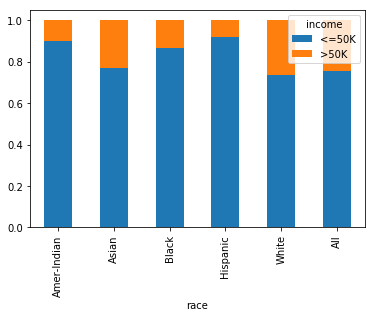

In [137]:
race_income.plot(kind='bar', stacked=True)

In [138]:
##This visualization of race vs. income (shown as percentages, thus adding
##up to total 1) allows me to see that the majority of all participants of all
##races made less than 50k. A greater percentage of white and asian participants
##made over 50k, while a much smaller-than-average amount of hispanic and 
##american indian participants made over 50k.

In [139]:
##class vs. income, represented as percentages
class_income = pd.crosstab([adult.workclass], [adult.income], margins=True, normalize='index')
class_income

income,<=50K,>50K
workclass,,
Private,0.783504,0.216496
Public,0.702354,0.297646
Self-emp,0.631533,0.368467
All,0.753612,0.246388


In [140]:
##sex vs. income, represented as percentages
sex_income = pd.crosstab([adult.sex], [adult.income], margins=True, normalize='index')
sex_income

income,<=50K,>50K
sex,,
Female,0.881149,0.118851
Male,0.693091,0.306909
All,0.753612,0.246388


In [141]:
##Some observations...
##People who were self employed have a higher percentage of >50k earners than
##the other two groups.
##Private sector has least amount of +50k earners
##Disturbingly, 30% of males made over 50k, while only 11% of females did.
##Hours worked per week didn't seem to be an accurate predictor of wealth.

In [142]:
## (b.) Predictive Modeling and Model Evaluation
## Create dummy variables for the categorical attrib.
## Separate target attribute >50k from attributes used for
## training ((Note: also drop <=50k))
## Use scikit-learn to build classifiers using Naive Bayes,
## Decision tree ("entropy" as selection criteria), and 
## LDA. For each of these perform 10-fold cross-validation 
## (using cross-validation module in scikit-learn) and
## report the overall average accuracy.
## For the decision tree model, generate visualization

In [143]:
adult_matrix = pd.get_dummies(adult[['age', 'workclass', 'education', 'marital-status', 'race', 'sex', 'hours-per-week']])
adult_matrix.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0


In [144]:
adult_target = pd.get_dummies(adult[['income']])

In [145]:
adult_target = adult_target.drop(columns = 'income_<=50K')


In [146]:
adult_target.shape

(9412, 1)

In [151]:
##Reshaping
adult_target = np.array(adult_target)
adult_target = adult_target.reshape(9412,)

In [152]:
adult_target.shape

(9412,)

In [153]:
##Splitting into test and train
adult_train, adult_test, adult_target_train, adult_target_test = train_test_split(adult_matrix, adult_target, test_size=0.2, random_state=33)


In [391]:
## Decision Tree
## Please note: I added a much larger minimum sample split and also a max depth to make the
## Tree visualization stop looking so insane (overfit?)
## Accuracy went down ever so slightly but I still find this preferable for visualization
TREE = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=120, max_depth = 8)

In [392]:
TREE = TREE.fit(adult_train, adult_target_train)

In [393]:
tree_pred_test = TREE.predict(adult_test)

In [394]:
print(TREE.score(adult_test, adult_target_test))

0.8098778544875199


In [395]:
print(TREE.score(adult_train, adult_target_train))

0.8238809934918316


In [396]:
##Cross validation
from sklearn import cross_validation
cv_scores = cross_validation.cross_val_score(TREE, adult_matrix, adult_target, cv=10 )
cv_scores

array([0.8 , 0.8 , 0.81, 0.82, 0.82, 0.8 , 0.81, 0.82, 0.83, 0.82])

In [397]:
##Naive Bayes
nb = naive_bayes.GaussianNB()
nb = nb.fit(adult_train, adult_target_train)

In [398]:
print(nb.score(adult_test, adult_target_test))

0.7190653212958046


In [399]:
print(nb.score(adult_train, adult_target_train))

0.720547217425953


In [400]:
##Naive Bayes Cross Validation
cv_nb_scores = cross_validation.cross_val_score(nb, adult_matrix, adult_target, cv=10 )
cv_nb_scores

array([0.73, 0.7 , 0.73, 0.7 , 0.73, 0.71, 0.71, 0.72, 0.73, 0.71])

In [401]:
import warnings

In [402]:
##LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    lda = LinearDiscriminantAnalysis()
    lda = lda.fit(adult_train, adult_target_train)

In [403]:
print(lda.score(adult_test, adult_target_test))

0.8104089219330854


In [404]:
print(lda.score(adult_train, adult_target_train))

0.8063487846991633


In [405]:
##LDA Cross Validation
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    cv_lda_scores = cross_validation.cross_val_score(lda, adult_matrix, adult_target, cv=10 )
cv_lda_scores

array([0.81, 0.81, 0.79, 0.82, 0.81, 0.79, 0.8 , 0.81, 0.82, 0.82])

In [406]:
cv_scores = cross_validation.cross_val_score(TREE, adult_matrix, adult_target, cv=10 )
cv_scores

array([0.8 , 0.8 , 0.81, 0.82, 0.82, 0.8 , 0.81, 0.82, 0.83, 0.82])

In [407]:
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy: 0.81 (+/- 0.02)


In [408]:
from sklearn.tree import export_graphviz
export_graphviz(TREE, out_file='newtree.dot', feature_names=adult_train.columns)

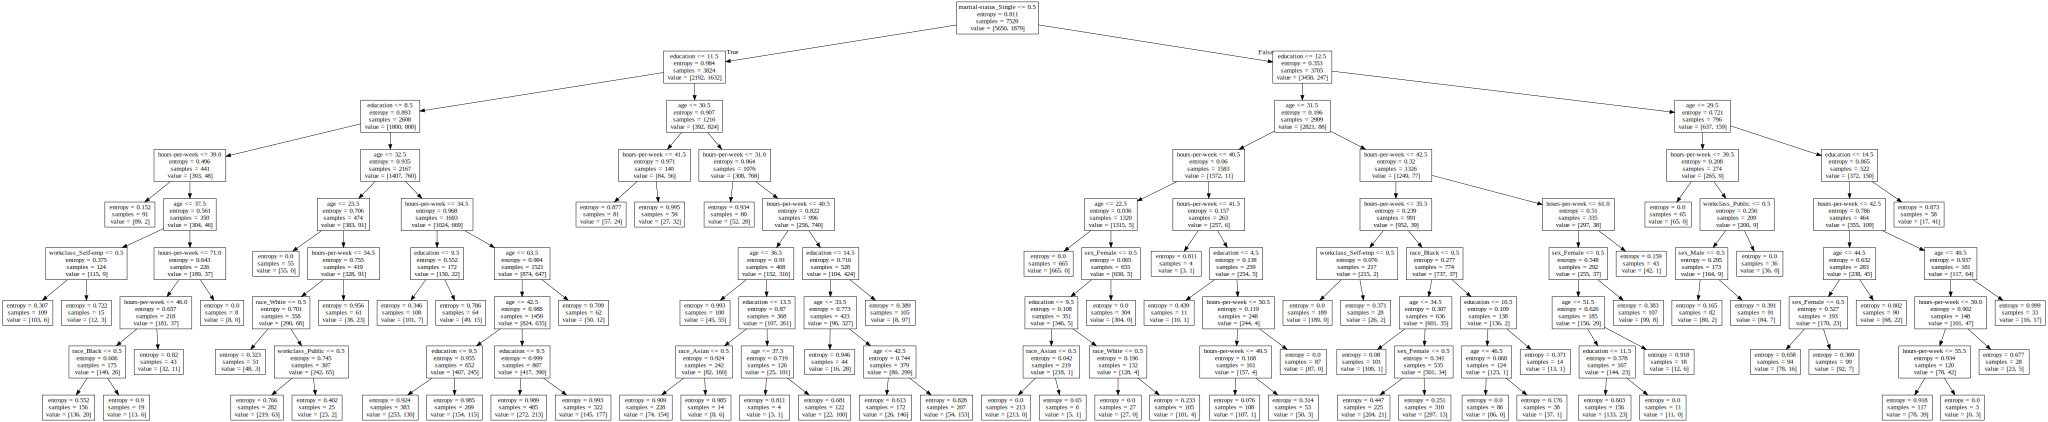

In [409]:
import graphviz
with open('newtree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [410]:
system(dot -Tpng newtree.dot -o dtree.png)

[]

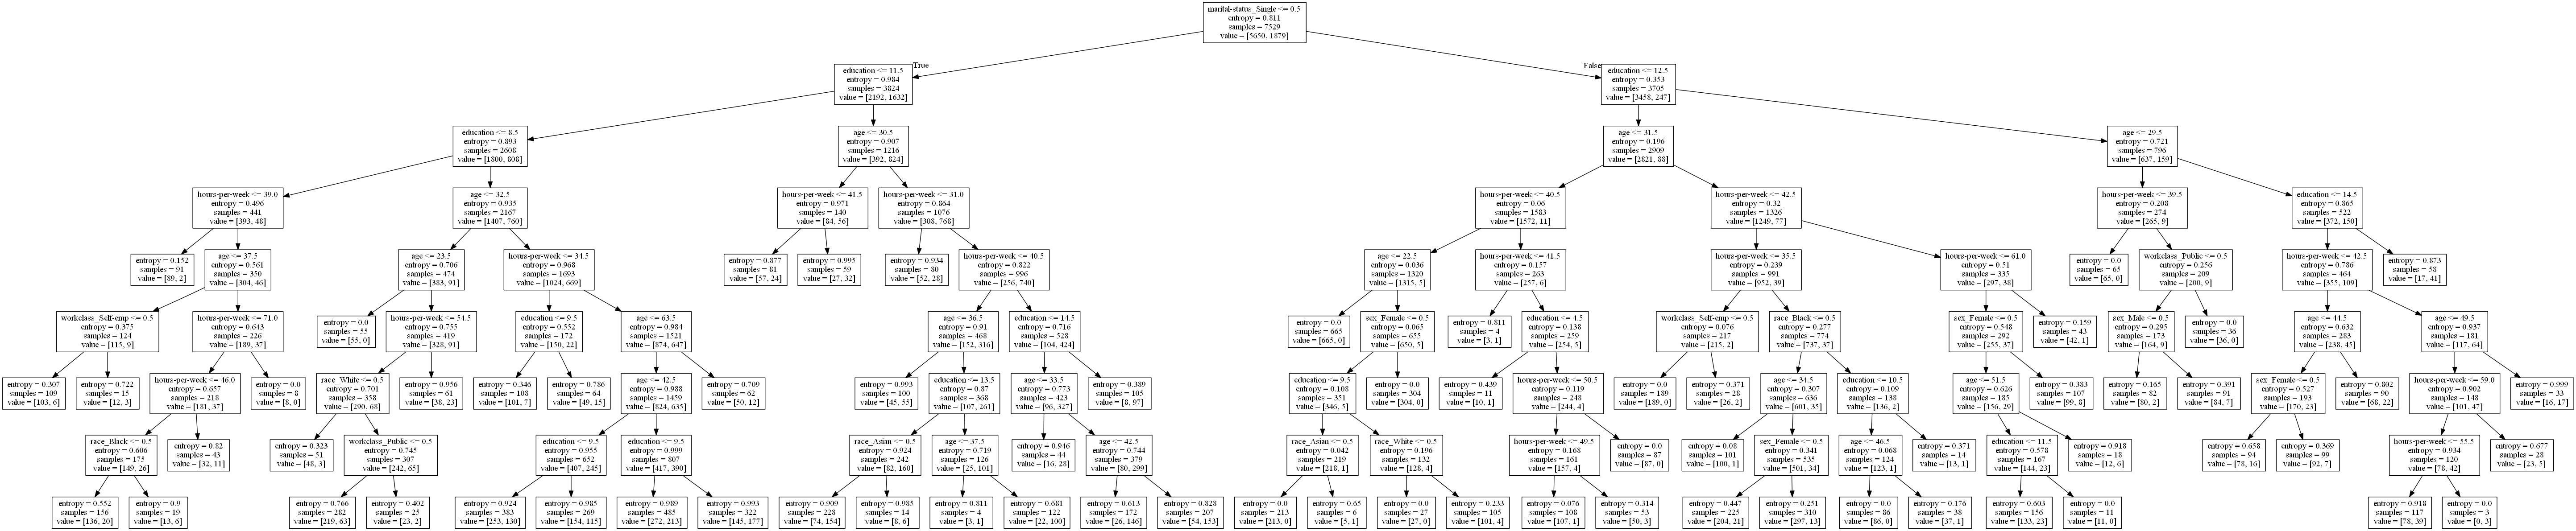

In [411]:
from IPython.display import Image
Image(filename= 'dtree.png', width=800)